In [9]:
from sysdata.sim.csv_futures_sim_data import csvFuturesSimData
from paper.systems.simplesystem import simplesystem
from ctse.systems.ct_system import ct_system
import pandas as pd
import matplotlib.pyplot as plt

system = ct_system()
rawdata = system.rawdata
data = system.data

2022-11-16 16:22:49 {'type': 'csvFuturesSimData'} [Warning] No key for csvFxPricesData in csv_data_paths, will use defaults (may break in production, should be fine in sim)
2022-11-16 16:22:49 {'type': 'csvFuturesSimData'} [Warning] No key for csvRollParametersData in csv_data_paths, will use defaults (may break in production, should be fine in sim)


In [10]:
from paper.systems.rules.mac import mac
from paper.systems.rules.mac import ewmac

instrument_code = 'AP'
fast = 4
slow = 4 * fast

price = data.daily_prices(instrument_code)
forecast = mac(price, fast, slow)
forecast.columns = ['forecast']
forecast.to_csv('mac.csv')


price = data.daily_prices(instrument_code)
ewforecast = ewmac(price, fast, slow)
ewforecast.columns = ['ewforecast']
ewforecast.to_csv('ewmac.csv')

index
2017-12-22    0.000000
2017-12-25    0.000000
2017-12-26    0.000000
2017-12-27    0.000000
2017-12-28    0.000000
                ...   
2022-08-24    3.138906
2022-08-25    3.110003
2022-08-26    3.161531
2022-08-29    3.177278
2022-08-30    3.161150
Freq: B, Name: mac, Length: 1223, dtype: float64

index
2017-12-22    0.000000
2017-12-25    0.000000
2017-12-26    0.000000
2017-12-27    0.000000
2017-12-28    0.000000
                ...   
2022-08-24    4.661741
2022-08-25    4.632839
2022-08-26    4.684366
2022-08-29    4.700114
2022-08-30    4.683985
Freq: B, Name: ewmac, Length: 1223, dtype: float64

<AxesSubplot:xlabel='index'>

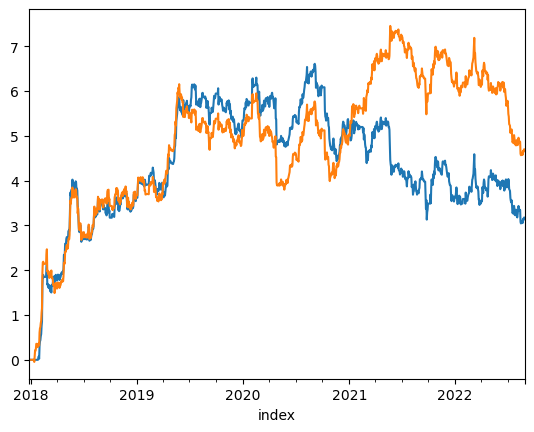

In [11]:
from systems.accounts.account_forecast import pandl_for_instrument_forecast
account = pandl_for_instrument_forecast(forecast=forecast, price = price)
ewaccount = pandl_for_instrument_forecast(forecast=ewforecast, price = price)

pl = account.curve().rename('mac')
ewpl = ewaccount.curve().rename('ewmac')
display(pl)
display(ewpl)
pl.plot()
ewpl.plot()

<AxesSubplot:>

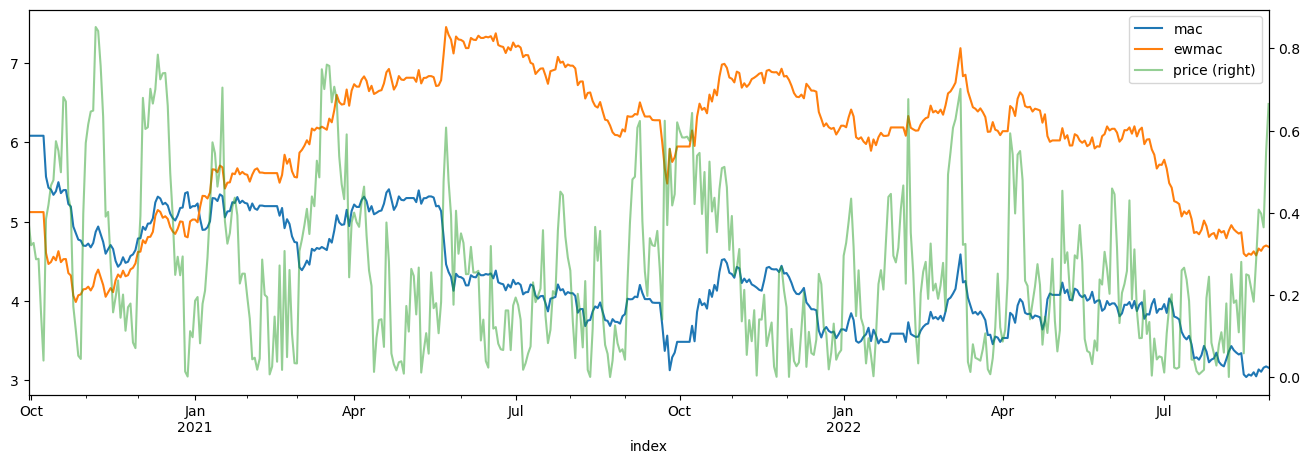

In [12]:
pl.tail(500).plot(legend=True, figsize=(16,5))
ewpl.tail(500).plot(legend=True)
# price.head(500).plot(legend=True, secondary_y=True)

from mdi import rolling_snr
snr = rolling_snr(price.ffill(), slow)
snr.tail(500).plot(legend=True, secondary_y=True, alpha=0.5)